In [1]:
%load_ext autoreload
%autoreload 2
%load_ext jupyter_black

In [2]:
import base64
import os
import sys
import boto3
from PIL import Image

sys.path.append(os.pardir)
from utils.aws_utils import invoke_sagemaker_endpoint
from utils.config_handler import load_config
from utils.enums import DirName, FileName
from utils.logger import logger
from utils.misc import decode_base64_image, display_images, get_dir_path

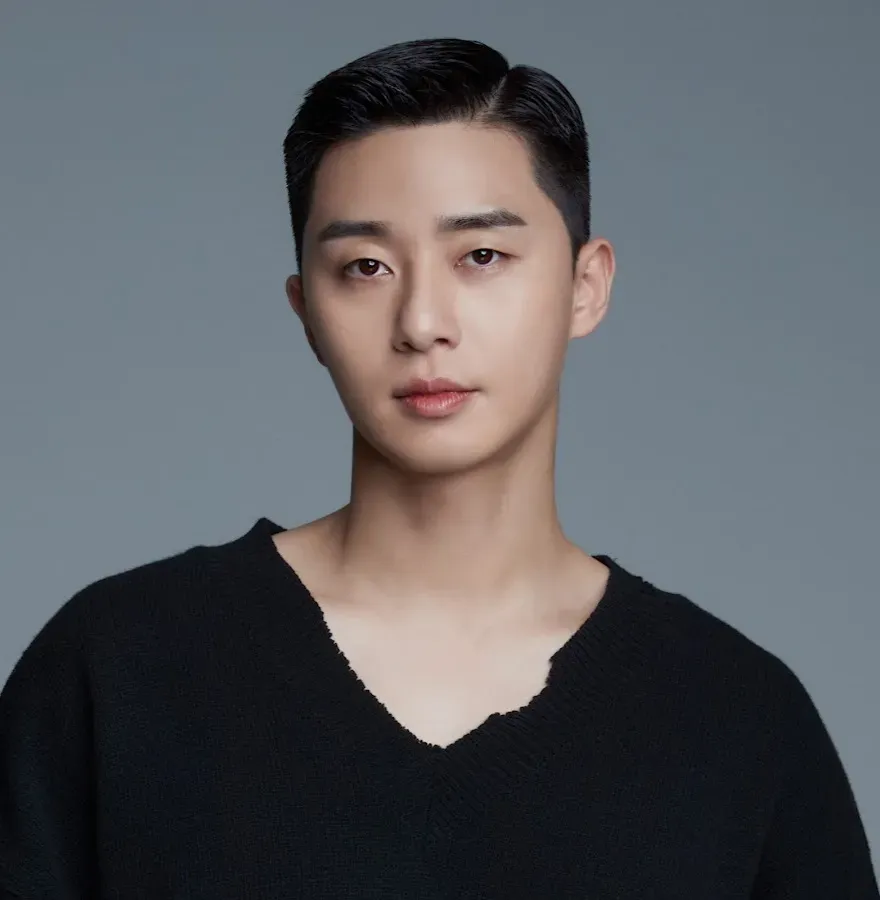

In [3]:
IMAGE_FILENAME = "input.jpg"  # Your sample image

config_dir = get_dir_path(str(os.path.join(os.pardir, DirName.CONFIGS)))
config = load_config(str(os.path.join(config_dir, FileName.CONFIG)))

boto_session = boto3.Session(
    region_name=config.region_name, profile_name=config.profile_name
)

image_path = os.path.join(os.pardir, DirName.ASSETS, IMAGE_FILENAME)
with open(image_path, "rb") as file:
    image = file.read()

display(Image.open(image_path))

In [4]:
%%time
payload = {
    "prompt": "a photo of a man as the ironman",  # Your sample prompt
    "negative_prompt": "bad anatomy, blurry, low quality, low resolution, monochrome, worst quality",
    "image": base64.b64encode(bytearray(image)).decode(),
    "s_scale": 1.0,
    "num_samples": 4,
    "width": 512,
    "height": 768,
    "num_inference_steps": 30,
    "seed": 42,
}

response = invoke_sagemaker_endpoint(
    boto_session, f"{config.proj_name}-endpoint", payload, logger=logger
)

CPU times: user 64.5 ms, sys: 31.2 ms, total: 95.7 ms
Wall time: 30.1 s


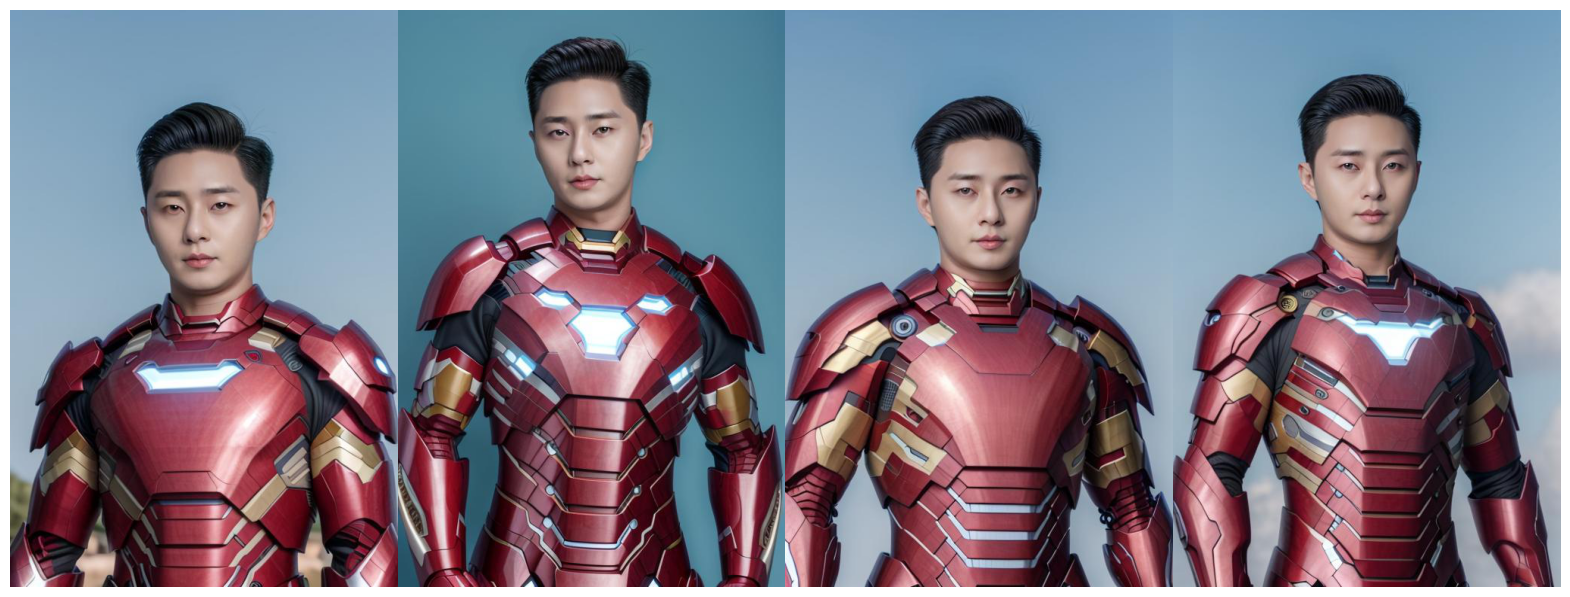

In [5]:
images = [decode_base64_image(image) for image in response["generated_images"]]
display_images(images, n_columns=4)